In [21]:
import numpy as np
import pandas as pd

In [22]:
np.random.seed(23)

mu_vect1 = np.array([0,0,0])
cov_mat1 = np.array(([1,0,0],[0,1,0],[0,0,1]))
class1_sample = np.random.multivariate_normal(mu_vect1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vect2 = np.array([1,1,1])
cov_mat2 = np.array(([1,0,0],[0,1,0],[0,0,1]))
class2_sample = np.random.multivariate_normal(mu_vect2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df['target'] = 0

df = pd.concat([df,df1], ignore_index=True)

df = df.sample(40)

In [23]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,0.0
34,0.177061,-0.598109,1.226512,NaN
14,0.420623,0.411620,-0.071324,0.0
11,1.968435,-0.547788,-0.679418,0.0
12,-2.506230,0.146960,0.606195,0.0


In [24]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [25]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [26]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [27]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [28]:
print("Eigen values :", eigen_values)
print("Eigen vectors :", eigen_vectors)

Eigen values : [1.3536065  0.94557084 0.77774573]
Eigen vectors : [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


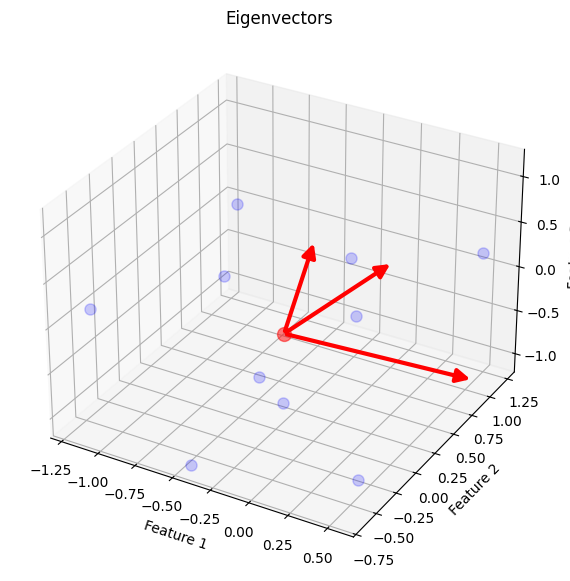

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, ax.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        # Dummy method to prevent errors; doesn't need to do anything.
        return 0

# Sample DataFrame setup
import pandas as pd

# Create a DataFrame with dummy data
df = pd.DataFrame({
    'feature1': np.random.randn(10),
    'feature2': np.random.randn(10),
    'feature3': np.random.randn(10)
})
# Dummy eigenvectors
eigen_vectors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)

# Plot eigenvectors
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Eigenvectors')
plt.show()


In [30]:
pc = eigen_vectors[0:2]
pc

array([[1, 0, 0],
       [0, 1, 0]])

In [32]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
df['target'] = np.random.choice([0, 1], size=len(df))  # Generates random binary targets
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.086530,0.360690,0
1,-0.444624,-0.088022,0
2,-0.031270,0.520090,1
3,0.537168,-0.486973,0
4,-0.426407,-0.286532,0


In [34]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()